## Imports

In [1]:
# %pip install numpy pandas matplotlib scikit-learn seaborn geopandas

In [2]:

import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
import numpy as np
import geopandas as gpd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Set Pandas to display all columsn
pd.set_option("display.max.columns", None)
sns.set_palette("husl")  # Set the color palette


# Dataset Overview

### 01. Load the dataset

In [3]:
dataset = pd.read_csv('data_preprocessing/yield_df.csv', encoding='utf-8', index_col=[0])

### 02. Explore the dataset

Explore files

In [4]:
dataset.head(5)

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [5]:
# Rename
dataset = dataset.rename(columns={'hg/ha_yield': 'Crop Yield (hg/ha)', 'Item': 'Crop', 'average_rain_fall_mm_per_year': 'Rainfall (mm/year)', 'pesticides_tonnes': 'Pesticides (tonnes)', 'avg_temp': 'Temperature (Celsius)'})

In [6]:
# Whole dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28242 entries, 0 to 28241
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Area                   28242 non-null  object 
 1   Crop                   28242 non-null  object 
 2   Year                   28242 non-null  int64  
 3   Crop Yield (hg/ha)     28242 non-null  int64  
 4   Rainfall (mm/year)     28242 non-null  float64
 5   Pesticides (tonnes)    28242 non-null  float64
 6   Temperature (Celsius)  28242 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 1.7+ MB


Select files (<i>yield_df.csv</i>)

In [7]:
# Columns
columns = list(dataset.columns)
dataset.columns

Index(['Area', 'Crop', 'Year', 'Crop Yield (hg/ha)', 'Rainfall (mm/year)',
       'Pesticides (tonnes)', 'Temperature (Celsius)'],
      dtype='object')

In [8]:
# Crops available 
crops = dataset.Crop.unique()
print('Types of crops: ', crops)

# Create color palette
colors = sns.color_palette('hls', len(crops))
palette = {mode: color for mode, color in zip(crops, colors)}


Types of crops:  ['Maize' 'Potatoes' 'Rice, paddy' 'Sorghum' 'Soybeans' 'Wheat' 'Cassava'
 'Sweet potatoes' 'Plantains and others' 'Yams']


In [9]:
# Shows NA or NAN
dataset.isna().any()

Area                     False
Crop                     False
Year                     False
Crop Yield (hg/ha)       False
Rainfall (mm/year)       False
Pesticides (tonnes)      False
Temperature (Celsius)    False
dtype: bool

In [10]:
dataset.describe().to_csv('describe.csv')
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,28242.0,2001.544296,7.051905,1990.00,1995.0000,2001.00,2008.00,2013.00
Crop Yield (hg/ha),28242.0,77053.332094,84956.612897,50.00,19919.2500,38295.00,104676.75,501412.00
Rainfall (mm/year),28242.0,1149.055980,709.812150,51.00,593.0000,1083.00,1668.00,3240.00
Pesticides (tonnes),28242.0,37076.909344,59958.784665,0.04,1702.0000,17529.44,48687.88,367778.00
Temperature (Celsius),28242.0,20.542627,6.312051,1.30,16.7025,21.51,26.00,30.65


In [11]:
# Skew 
dataset.skew(numeric_only=True)

Year                     0.012243
Crop Yield (hg/ha)       1.793229
Rainfall (mm/year)       0.853832
Pesticides (tonnes)      3.490289
Temperature (Celsius)   -0.741582
dtype: float64

### Plot Data

#### 03. Plot all variables

In [12]:
dataset['Crop'].value_counts()

Potatoes                4276
Maize                   4121
Wheat                   3857
Rice, paddy             3388
Soybeans                3223
Sorghum                 3039
Sweet potatoes          2890
Cassava                 2045
Yams                     847
Plantains and others     556
Name: Crop, dtype: int64

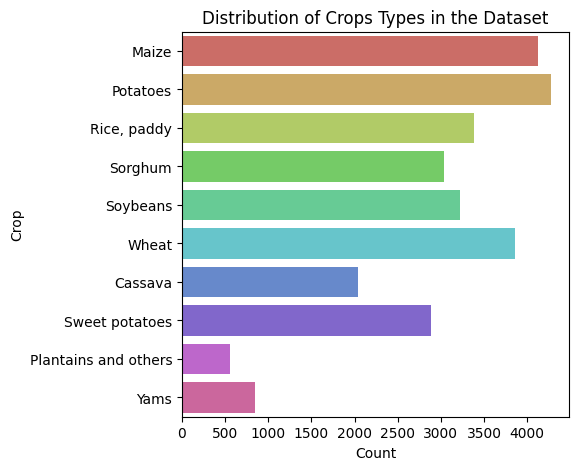

In [13]:
# Categorical Data Plot Distribution
# Countplot Crop
plt.figure(figsize=(5, 5))
sns.countplot(data=dataset, y='Crop', palette=palette)
plt.title('Distribution of Crops Types in the Dataset')
plt.ylabel('Crop')
plt.xlabel('Count')
plt.show()


In [14]:
# %pip install wordcloud
area_count = dataset['Area'].value_counts()
area_count

India         4048
Brazil        2277
Mexico        1472
Pakistan      1449
Japan          966
              ... 
Estonia         42
Belgium         39
Bahrain         29
Sudan           28
Montenegro      24
Name: Area, Length: 101, dtype: int64

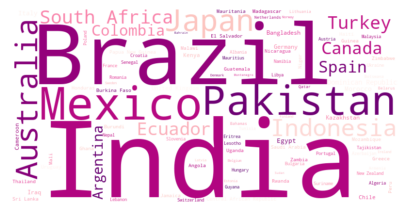

In [15]:
from wordcloud import WordCloud

# Get Area counts
area_count = dataset['Area'].value_counts()

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, colormap='RdPu', background_color='white').generate_from_frequencies(area_count)

# Plot the word cloud
plt.figure(figsize=(5, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [16]:
columns_select = columns.copy()
columns_select.remove('Area')
columns_select.remove('Crop')
columns_select

['Year',
 'Crop Yield (hg/ha)',
 'Rainfall (mm/year)',
 'Pesticides (tonnes)',
 'Temperature (Celsius)']

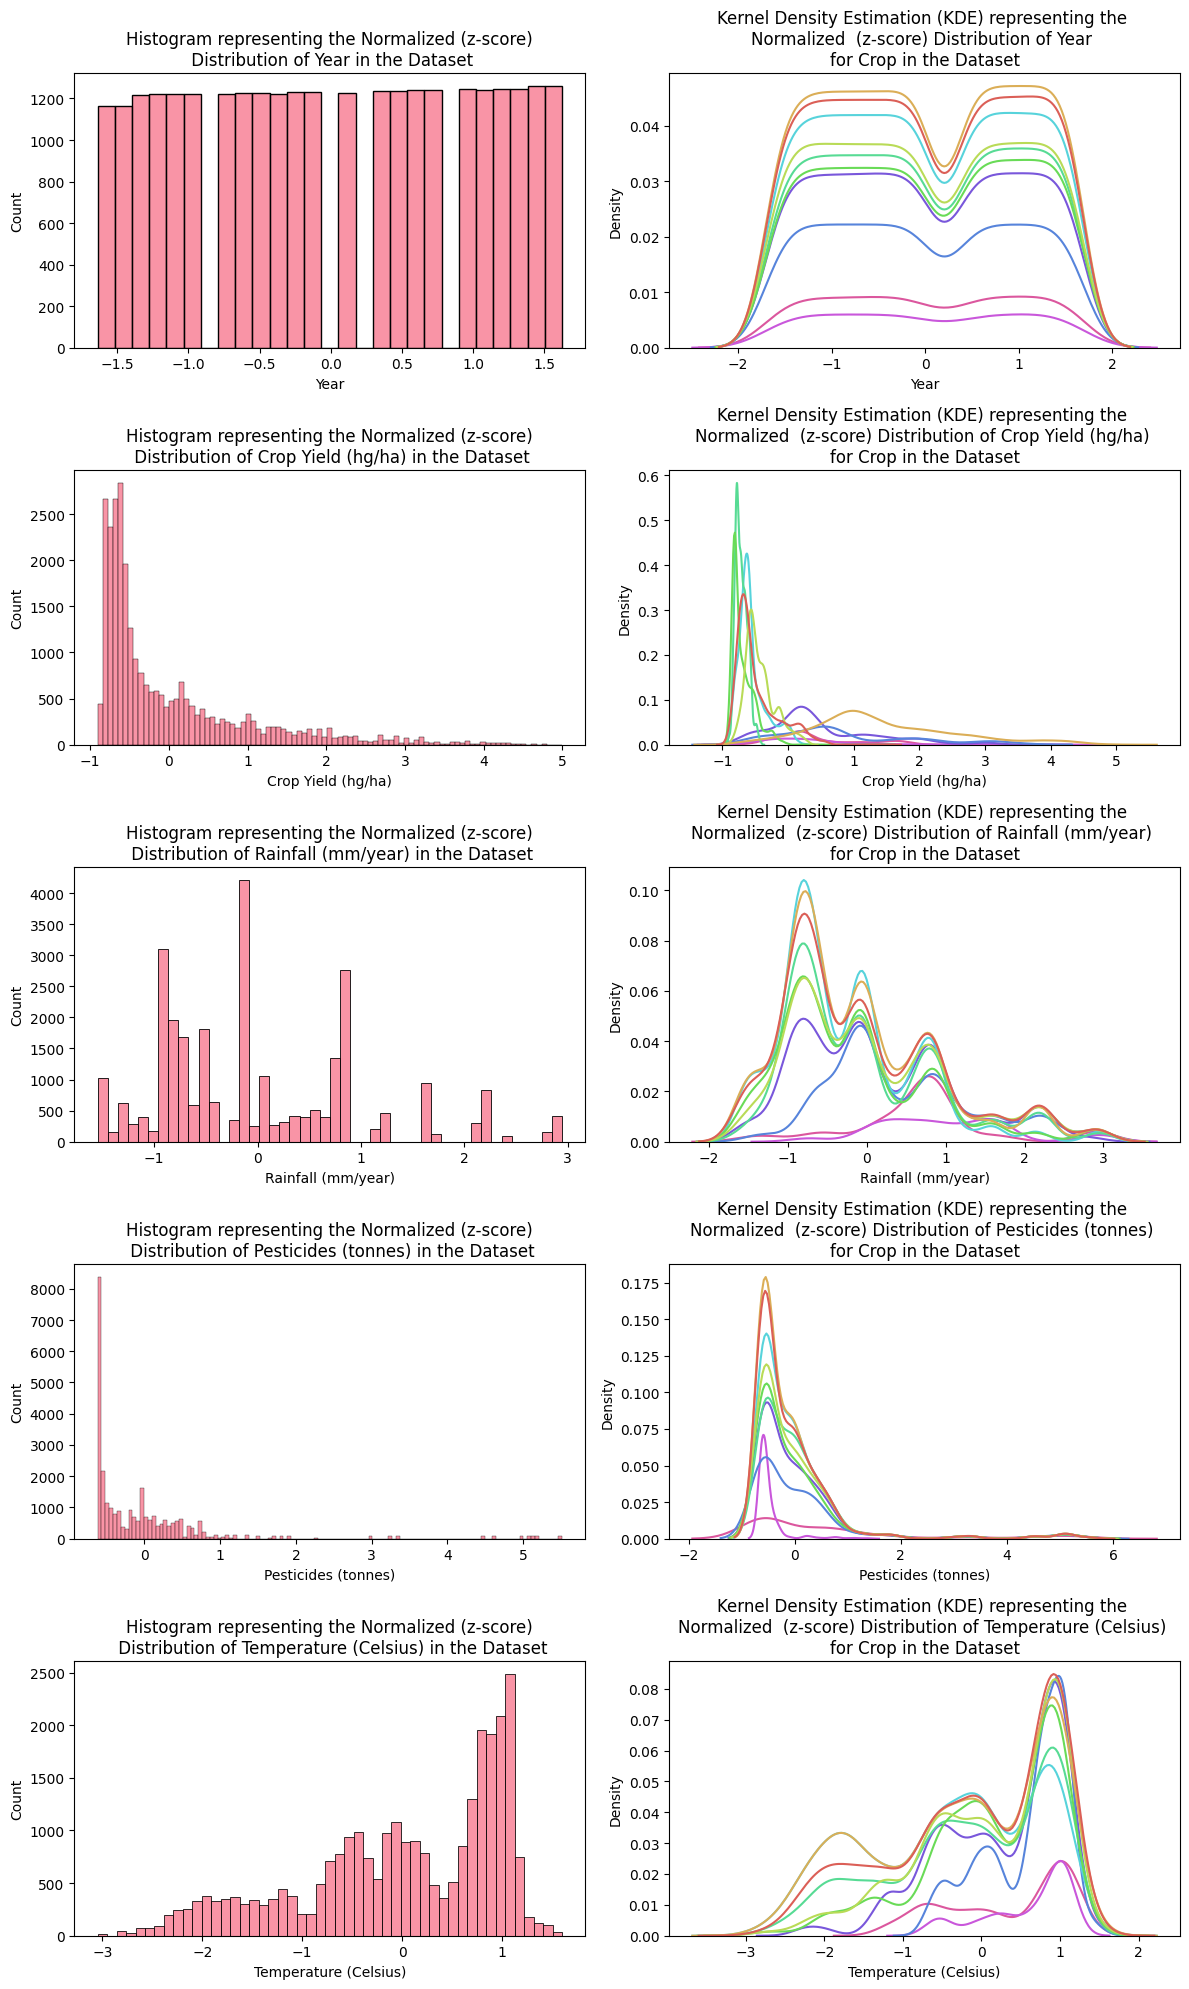

In [17]:
# Plot 1: Histogram of numerical variables
# Create subplots
fig, axes = plt.subplots(nrows=len(columns_select), ncols=2, figsize=(12, 4*len(columns_select)))

# Normalize the columns using z-score normalization
# Select only the numerical columns
numerical_columns = dataset.select_dtypes(include=[float, int]).columns

# Normalize the numerical columns using z-score normalization
n_dataset = dataset.copy()
n_dataset[numerical_columns] = (dataset[numerical_columns] - dataset[numerical_columns].mean()) / dataset[numerical_columns].std()
# Iterate over the selected columns
for i, col in enumerate(columns_select):
    # Select the current axis for the subplot
    ax1 = axes[i][0]
    ax2 = axes[i][1]

    # Plot the histogram
    sns.histplot(x=col, data=n_dataset, palette=palette, ax=ax1, legend=False)
    sns.kdeplot(x=col, hue="Crop", data=n_dataset, palette=palette, ax=ax2, legend=False)

    # Set subplot title and axis labels
    ax1.set_title(f'Histogram representing the Normalized (z-score)\n Distribution of {col} in the Dataset')
    ax2.set_title(f'Kernel Density Estimation (KDE) representing the \nNormalized  (z-score) Distribution of {col} \nfor Crop in the Dataset')


# Adjust the layout of subplots
plt.tight_layout()

# Show the subplots
plt.show()

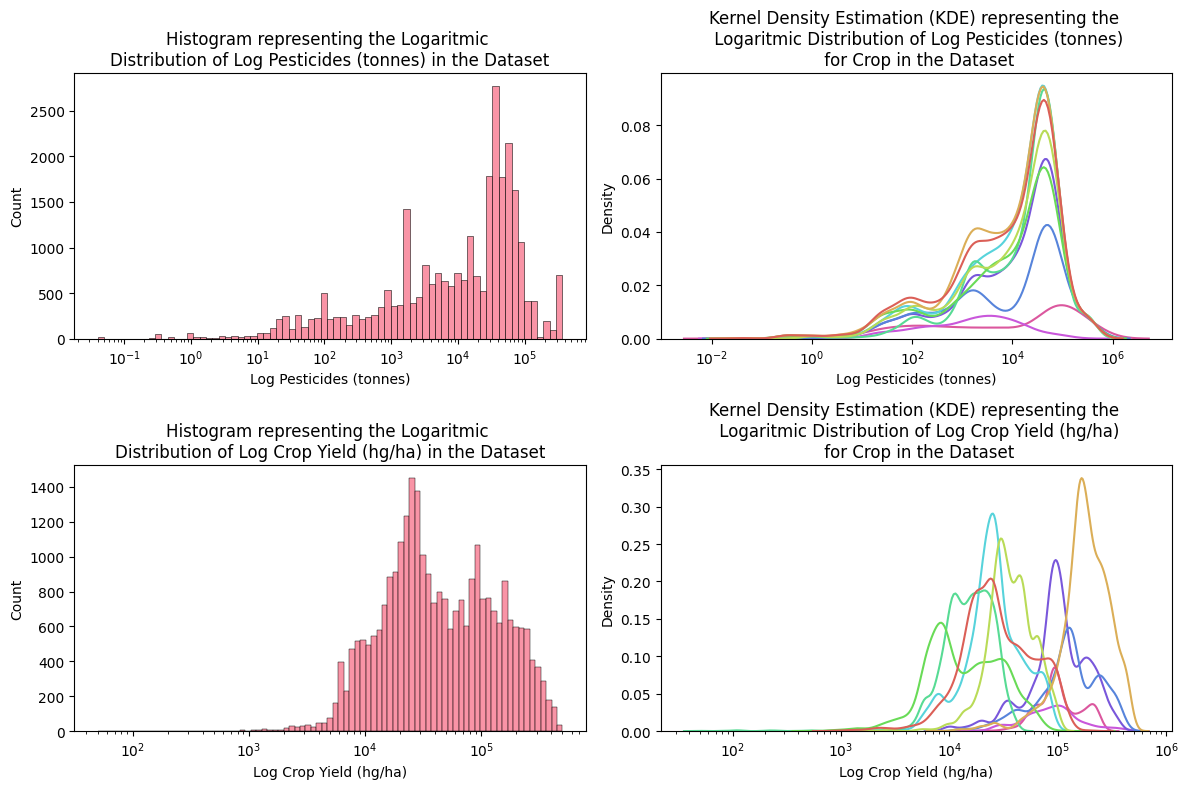

In [18]:
# Plot 2: Histogram of the log variables
# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 4*2))

# Normalize the numerical columns using z-score normalization
n_dataset = dataset.copy()

# Turn yield & pesticides into logaritmic
n_dataset['Log Crop Yield (hg/ha)'] = dataset['Crop Yield (hg/ha)']
n_dataset['Log Pesticides (tonnes)'] = dataset['Pesticides (tonnes)']

# n_dataset[numerical_columns] = (dataset[numerical_columns] - dataset[numerical_columns].mean()) / dataset[numerical_columns].std()

# Iterate over the selected columns
for i, col in enumerate(['Log Pesticides (tonnes)', 'Log Crop Yield (hg/ha)']):

    # Select the current axis for the subplot
    ax1 = axes[i][0]
    ax2 = axes[i][1]

    # Plot the histogram
    sns.histplot(x=col, data=n_dataset, log_scale=True, palette=palette, ax=ax1, legend=False)
    sns.kdeplot(x=col, hue="Crop", data=n_dataset, log_scale=True, palette=palette, ax=ax2, legend=False)

    # Set subplot title and axis labels
    ax1.set_title(f'Histogram representing the Logaritmic \nDistribution of {col} in the Dataset')
    ax2.set_title(f'Kernel Density Estimation (KDE) representing the \n Logaritmic Distribution of {col}\n for Crop in the Dataset')

# Adjust the layout of subplots
plt.tight_layout()

# Show the subplots
plt.show()

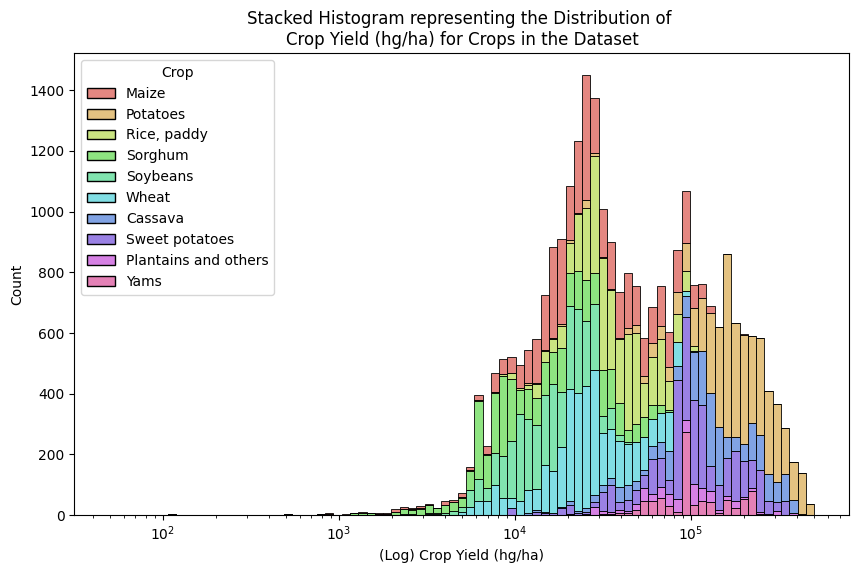

In [19]:
# Plot 3: Histogram of of the 'Yield' column
plt.figure(figsize=(10, 6))
sns.histplot(x='Crop Yield (hg/ha)', log_scale=True, hue="Crop", data=dataset, palette=palette, multiple='stack')
plt.title('Stacked Histogram representing the Distribution of \nCrop Yield (hg/ha) for Crops in the Dataset')
plt.xlabel('(Log) Crop Yield (hg/ha)')
plt.ylabel('Count')
plt.show()

In [20]:
# Plot 4: Bar plot of the 'Area' column
# top_n = 30
# top_areas = dataset['Area'].value_counts().nlargest(top_n).index
# filtered_data = dataset.loc[dataset['Area'].isin(top_areas)]

# # Replace less frequent areas with 'Other'
# filtered_data.loc[~filtered_data['Area'].isin(top_areas), 'Area'] = 'Other'

# # Plot the bar chart
# plt.figure(figsize=(10, 6))
# sns.countplot(data=filtered_data, x='Area', hue="Crop", palette=palette)
# plt.title('Bar Plot representing the Distribution of Areas (Top ' + str(top_n) + ' Areas) in the Dataset')
# plt.xlabel('Area')
# plt.ylabel('Count')
# plt.xticks(rotation=90)

# plt.show()

In [21]:
columns_select = columns.copy()
columns_select.remove('Area')
columns_select.remove('Year')
columns_select.remove('Crop')
columns_select

['Crop Yield (hg/ha)',
 'Rainfall (mm/year)',
 'Pesticides (tonnes)',
 'Temperature (Celsius)']

In [22]:
# Create an empty dictionary to store the percentage average increase per crop
average_increase = {}

# Iterate over the selected columns
for col in columns_select:
    average_increase[col] = {}
    # Group the dataset by 'Crop' and calculate the average yield per year
    crop_year_avg = dataset.groupby(['Crop', 'Year'])[col].mean().reset_index()

    # Iterate over each crop
    for crop in crop_year_avg['Crop'].unique():
        # Select data for the current crop
        crop_data = crop_year_avg[crop_year_avg['Crop'] == crop]

        # Calculate the percentage increase of crop yield from the first year to the last year
        percentage_increase = ((crop_data[col].iloc[-1] - crop_data[col].iloc[0]) / crop_data[col].iloc[0]) * 100

        # Store the percentage increase in the dictionary
        average_increase[col][crop] = percentage_increase

# # Print the average increase per crop
# for col, val in average_increase.items():
#     print(f"Average yearly {col} growth")
#     for crop,increase in val.items():
#         print(f'{crop}: {increase:.2f}%')
average_growth = pd.DataFrame.from_dict(average_increase)

In [23]:
average_growth

,Crop Yield (hg/ha),Rainfall (mm/year),Pesticides (tonnes),Temperature (Celsius)
Cassava,53.435269,-0.144771,126.230013,2.024532
Maize,70.162578,-2.881368,73.088973,-0.516946
Plantains and others,2.631679,-1.218515,121.097860,1.168221
Potatoes,35.365157,-3.049699,67.811490,-0.617003
"Rice, paddy",37.119535,-1.727324,79.840531,1.139067
Sorghum,23.381925,-3.442016,92.133888,-0.506401
Soybeans,16.308424,-0.833926,75.193956,0.906708
Sweet potatoes,32.688431,2.668179,83.722964,2.760178
Wheat,31.486740,-2.188853,69.348251,-0.726807
Yams,17.704218,2.666552,272.578943,3.316241


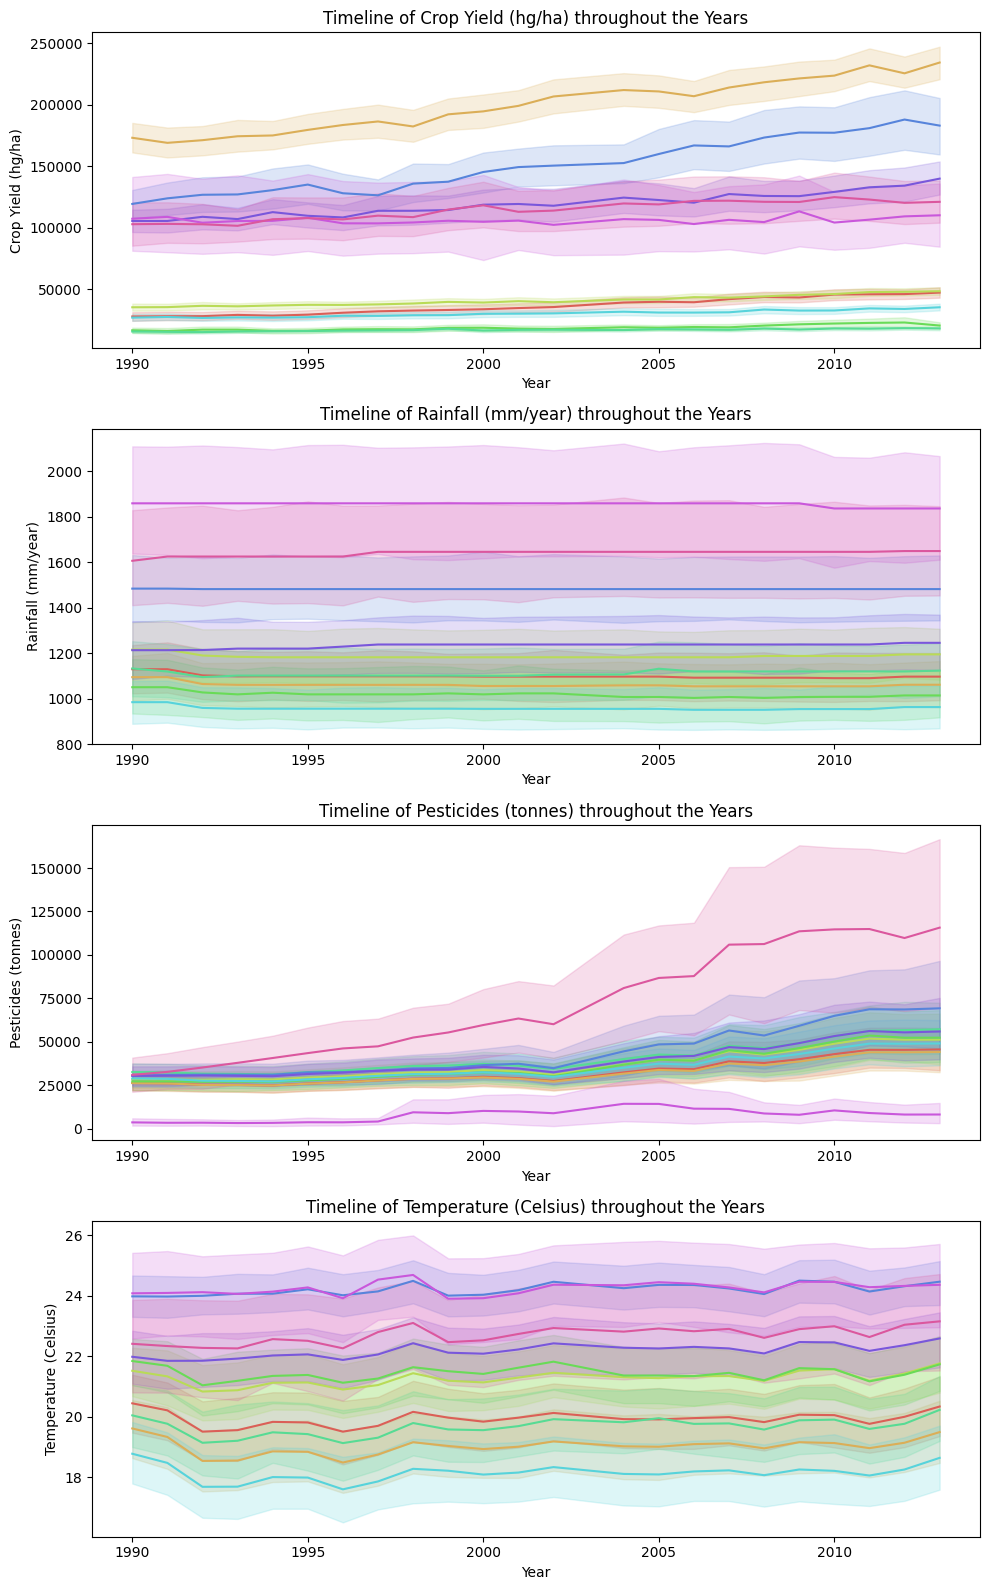

In [24]:
# Plot 5: Line plot of 'Year' vs. other variables
# Create subplots
fig, axes = plt.subplots(nrows=len(columns_select), ncols=1, figsize=(10, 4*len(columns_select)))

# Iterate over the selected columns
for i, col in enumerate(columns_select):
    # Select the current axis for the subplot
    ax = axes[i]

    # Plot the timeline
    sns.lineplot(data=dataset, x='Year', y=col, hue="Crop", ax=ax, palette=palette, legend=False)

    # Set subplot title and axis labels
    ax.set_title(f'Timeline of {col} throughout the Years')


# Adjust the layout of subplots
plt.tight_layout()

# Show the subplots
plt.show()

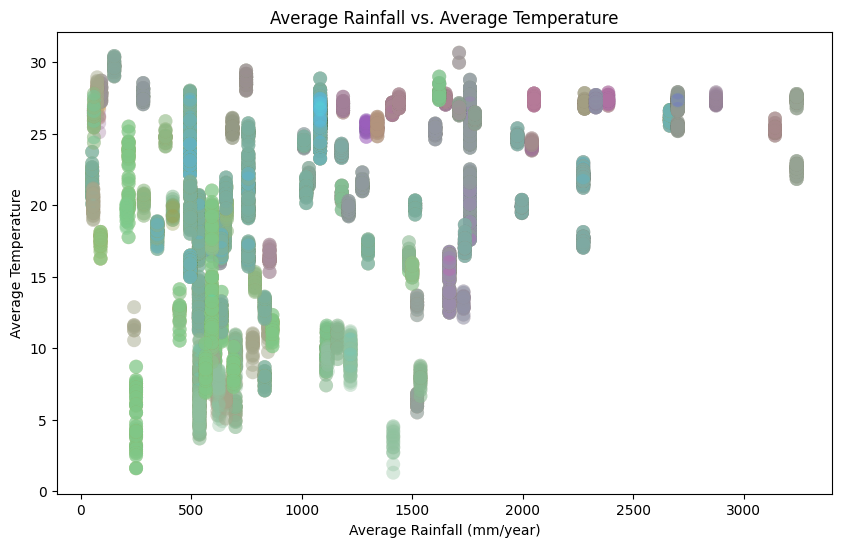

In [25]:
# Plot 6: Scatter plot of 'Rainfall (mm/year)' vs. 'Temperature (Celsius)'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=dataset, x='Rainfall (mm/year)', y='Temperature (Celsius)', alpha=0.2, linewidth=0, s=100,hue="Crop",palette=palette, legend=False)
plt.title('Average Rainfall vs. Average Temperature')
plt.xlabel('Average Rainfall (mm/year)')
plt.ylabel('Average Temperature')
plt.show()

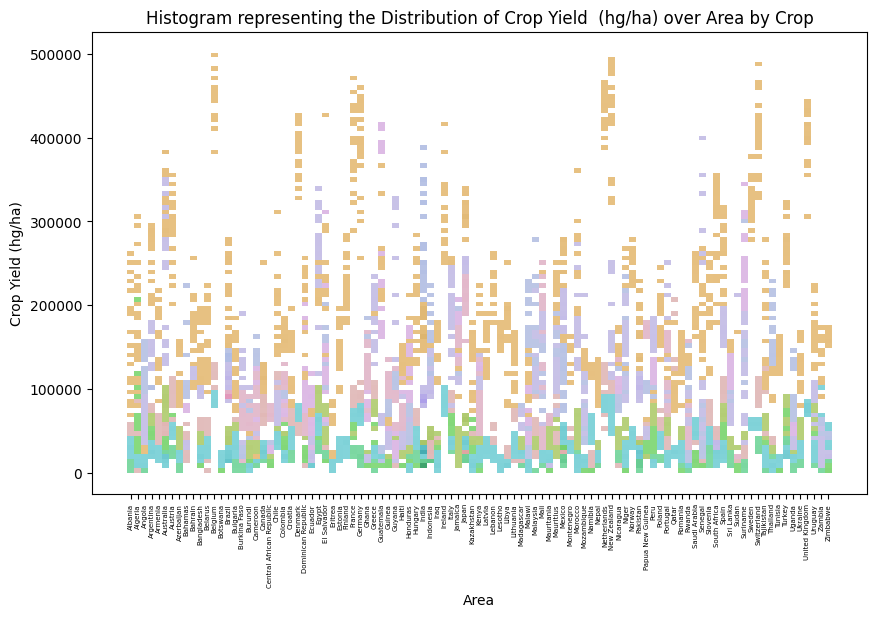

In [26]:
# Plot 7: Histoplot of 'Crop Yield (hg/ha)' for each 'Area'
plt.figure(figsize=(10, 6))
ax = sns.histplot(data=dataset, x='Area', y='Crop Yield (hg/ha)', hue="Crop", palette=palette, legend=False)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=5)
plt.title('Histogram representing the Distribution of Crop Yield  (hg/ha) over Area by Crop')
plt.xlabel('Area')
plt.ylabel('Crop Yield (hg/ha)')
plt.xticks(rotation=90)
plt.show()

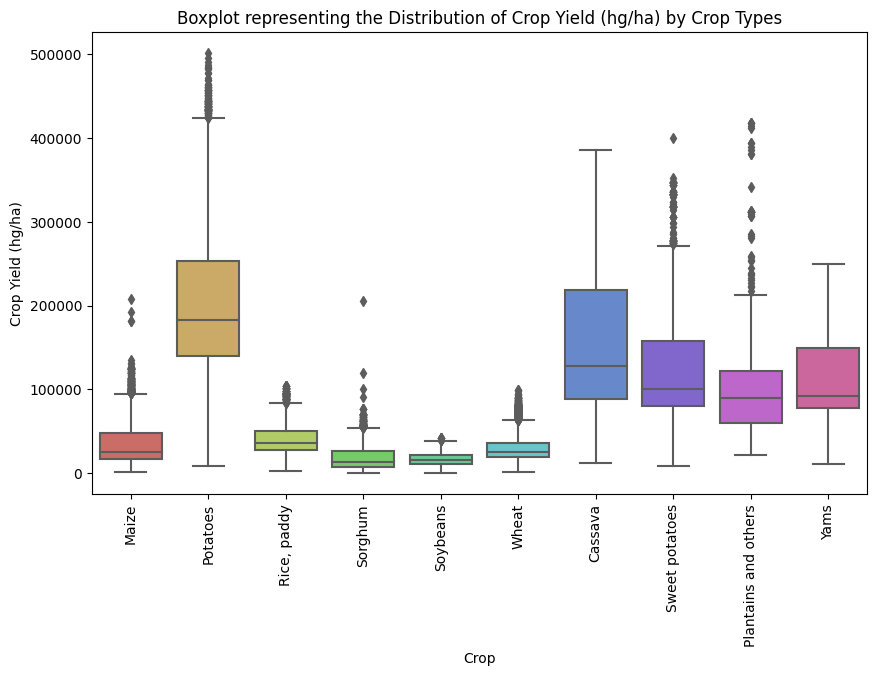

In [27]:
# Plot 8: Box plot of "Crop" vs. 'Crop Yield (hg/ha)'
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x="Crop", y='Crop Yield (hg/ha)', data=dataset, palette=palette)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.title('Boxplot representing the Distribution of Crop Yield (hg/ha) by Crop Types')
plt.xlabel('Crop')
plt.ylabel('Crop Yield (hg/ha)')
plt.show()

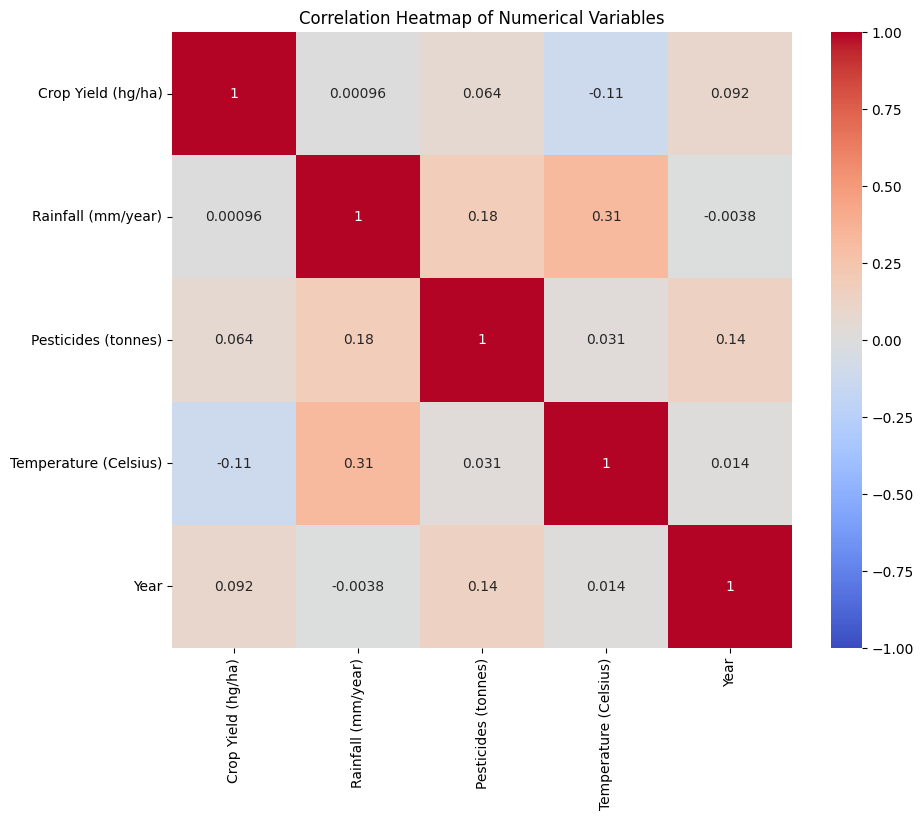

In [28]:
# Plot 9: Heatmap of correlation matrix
plt.figure(figsize=(10, 8))
corr_matrix = dataset[['Crop Yield (hg/ha)', 'Rainfall (mm/year)', 'Pesticides (tonnes)', 'Temperature (Celsius)', 'Year']].corr()
sns.heatmap(corr_matrix, vmin = -1, vmax = +1, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

In [29]:
corr_matrix

,Crop Yield (hg/ha),Rainfall (mm/year),Pesticides (tonnes),Temperature (Celsius),Year
Crop Yield (hg/ha),1.000000,0.000962,0.064085,-0.114777,0.091630
Rainfall (mm/year),0.000962,1.000000,0.180984,0.313040,-0.003798
Pesticides (tonnes),0.064085,0.180984,1.000000,0.030946,0.140930
Temperature (Celsius),-0.114777,0.313040,0.030946,1.000000,0.014409
Year,0.091630,-0.003798,0.140930,0.014409,1.000000


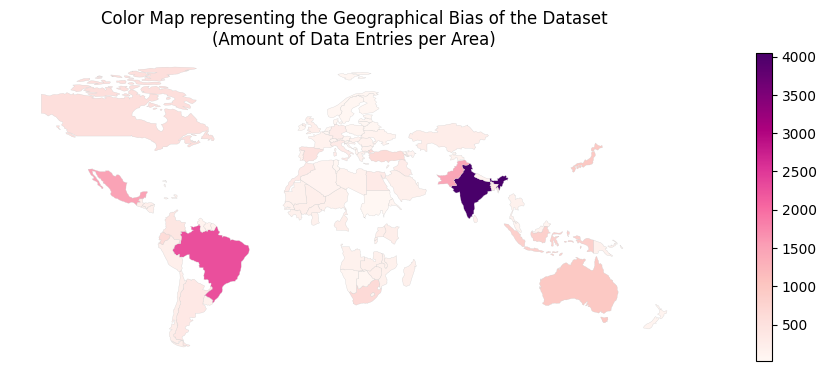

In [30]:
# Plot 10: Geographical Bias
# Get list of areas
areas_list = [ (area, count) for area, count in dataset['Area'].value_counts().to_dict().items() ]
# Read the Natural Earth dataset for country boundaries (level 0)
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge the count data with the Natural Earth dataset based on the country names
merged = world.merge(
    pd.DataFrame( areas_list, columns=['Country', 'Count']),
    left_on='name', right_on='Country', how='left'
)

# Filter out countries with count <= 0
filtered_data = merged[merged['Count'] > 0]

# Plot the choropleth map
fig, ax = plt.subplots(figsize=(15, 4))
filtered_data.plot(column='Count', linewidth=0.2, ax=ax, cmap='RdPu', edgecolor='0.8', legend=True)

# Customize the plot
ax.set_title('Color Map representing the Geographical Bias of the Dataset\n(Amount of Data Entries per Area)')
ax.set_axis_off()

plt.show()

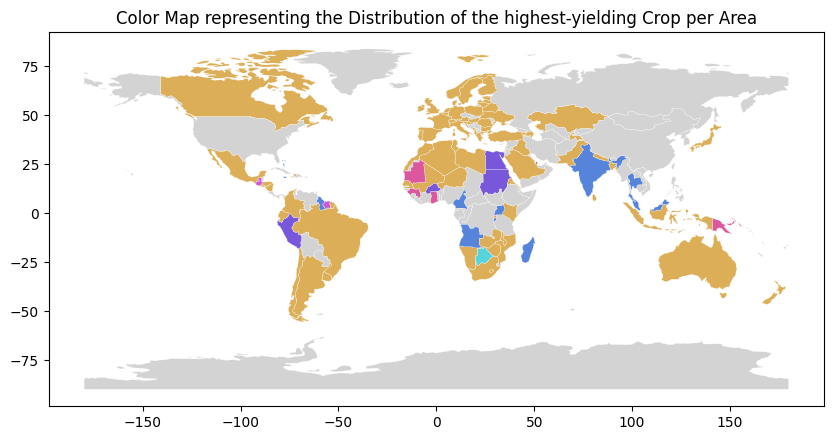

In [31]:
# Merge the map dataframe with the grouped dataframe by 'Area' column
grouped_df = dataset.groupby(['Crop', 'Area'])['Crop Yield (hg/ha)'].sum().reset_index()

# Find the index of the maximum yield for each area
max_yield_idx = grouped_df.groupby('Area')['Crop Yield (hg/ha)'].idxmax()

# Get the corresponding crop for each maximum yield
most_productive_crops = grouped_df.loc[max_yield_idx, ['Area', 'Crop', 'Crop Yield (hg/ha)']]
merged_df = world.merge(most_productive_crops, left_on='name', right_on='Area', how='left')

# Map the crop colors to the 'Crop' column in the merged dataframe
palette.update({np.nan : 'lightgrey' })
merged_df['Crop_Color'] = merged_df['Crop'].map(palette)

# Plot the map with color-coded crops
fig, ax = plt.subplots(figsize=(10, 8))
merged_df.plot(color=merged_df['Crop_Color'], linewidth=0.2, ax=ax, edgecolor='white')


# Set plot title
ax.set_title('Color Map representing the Distribution of the highest-yielding Crop per Area')

# Display the plot
plt.show()

In [32]:
# Handle categorical variables
# OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore')

# fit and transform the categorical data in Area and Item
encoded_data = encoder.fit_transform(dataset[["Crop", 'Area']])

# convert the encoded data back into a Pandas DataFrame
encoded_df = pd.DataFrame(encoded_data.toarray(), columns=encoder.get_feature_names_out(["Crop", 'Area']))
df = pd.concat([dataset, encoded_df], axis=1)

### 05. Remove Unnecesary Features

In [33]:
# Create features and labels (and remove categorical variables)
features = df.drop(['Crop Yield (hg/ha)',"Crop",'Area', 'Rainfall (mm/year)'], axis=1)
labels = df['Crop Yield (hg/ha)']